In [ ]:
# %load_ext autoreload
# %autoreload 2

In [ ]:
# import ujson
# # read the data
# with open('./my_examples/Cifar-10/data/test/cifa_test.json', 'r') as f:
#     data = ujson.load(f)

In [ ]:
# data.keys()

dict_keys(['users', 'user_data', 'num_samples'])

In [ ]:
# len(data["user_data"]["f_00000"]["y"])

1134

In [ ]:
# import ujson
# # read the data

# with open('./my_examples/Cifar-10/data/train/cifa_train.json', 'r') as f:
#     train_data = ujson.load(f)



In [ ]:
# train_data["user_data"].keys()

dict_keys(['f_00000', 'f_00001', 'f_00002', 'f_00003', 'f_00004', 'f_00005', 'f_00006', 'f_00007', 'f_00008', 'f_00009', 'f_00010', 'f_00011', 'f_00012', 'f_00013', 'f_00014', 'f_00015', 'f_00016', 'f_00017', 'f_00018', 'f_00019'])

In [ ]:
# # extract each client data and save it as hdf5 file
# import h5py
# import numpy as np
# import os

# for k, v in train_data["user_data"].items():
#     user_data = train_data["user_data"][k]
#     with h5py.File(f'./my_examples/Cifar-10/data/train/{k}', 'w') as f:
#         f.create_dataset('x', data=np.array(user_data["x"]))
#         f.create_dataset('y', data=np.array(user_data["y"]))
  

In [ ]:
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
# # download cifar-10 data
# import torchvision
# import torch
# import torchvision.transforms as transforms

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)


Files already downloaded and verified


<class 'int'>
car


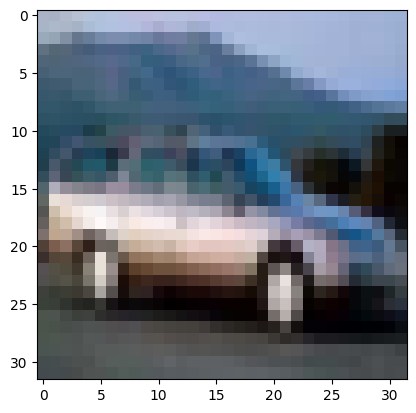

In [ ]:
# img = trainset[4][0]
# label = trainset[4][1]
# print(type(label))
# print(classes[label])
# # show image
# import matplotlib.pyplot as plt
# import numpy as np

# img = img / 2 + 0.5     # unnormalize
# npimg = img.numpy()
# plt.imshow(np.transpose(npimg, (1, 2, 0)))
# plt.show()



In [ ]:
# # read the client h5 file
# with h5py.File('./my_examples/Cifar-10/data/train/f_00019', 'r') as f:
#     x = f['x'][:]
#     y = f['y'][:]

In [ ]:
# import matplotlib.pyplot as plt
# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

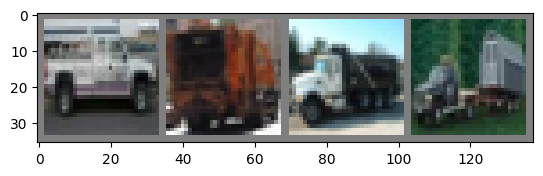

In [ ]:
# images = torch.tensor(x[0:4])
# imshow(torchvision.utils.make_grid(images))

## Custom Dataset class

In [ ]:
# # unzip the file into self.cfg.data.data_dir/self.cfg.data.name/train
# import zipfile
# import torch
# import os
# import gdown
# import h5py
# import numpy as np

In [ ]:
# class Cifar10_20clients(torch.utils.data.Dataset):
#     def __init__(self, cfg, id, train= True, download= True):
#         self.cfg = cfg
#         self.config_path = os.path.join(self.cfg.data.data_dir, self.cfg.data.name , "config.json")
#         self.train_path = os.path.join(self.cfg.data.data_dir, self.cfg.data.name , "train")
#         self.test_path = os.path.join(self.cfg.data.data_dir, self.cfg.data.name, "test")
#         self.train = train
#         self.id = id
#         self.download_data()
#         self.data = self.load_client_data()
    
    
#     def download_data(self):
#         if os.path.exists(os.path.join(self.cfg.data.data_dir, self.cfg.data.name, "cifar10_train_20.zip")):
#             return
#         else:
#             os.makedirs(os.path.join(self.cfg.data.data_dir, self.cfg.data.name), exist_ok= True)
        
#         if self.train:
#             url = "https://drive.google.com/file/d/14NBQaoW8etKzJ70Jf7BuANkR8MsN-j2Q/view?usp=sharing"
#             output = os.path.join(self.cfg.data.data_dir, self.cfg.data.name, "cifar10_train_20.zip")
#         else:
#             url = "https://drive.google.com/file/d/1H1_QDLVXfipwauLEA8RJy1vfq4X8V9je/view?usp=sharing"
#             output = os.path.join(self.cfg.data.data_dir, self.cfg.data.name, "cifar10_test_20.zip")

#         gdown.download(url=url, output=output, fuzzy=True)
#         with zipfile.ZipFile(output, 'r') as zip_ref:
#             zip_ref.extractall(f'{self.train_path}' if self.train else f'{self.test_path}')

#         print(f'Data downloaded and extracted to {self.train_path if self.train else self.test_path}')
            
#     def tensorify(self, data):
#         X = torch.tensor(data['x'], dtype= torch.float32)
#         y = torch.tensor(data['y'], dtype= torch.int64)
#         return {'x': X, 'y': y}

#     def load_client_data(self):
#         path, dir = (self.train_path, 'train') if self.train else (self.test_path, 'test')
#         if self.id < 10:
#             id = f'0000{self.id}'
#         else:
#             id = f'000{self.id}'
        
#         with h5py.File(os.path.join(path, f'f_{id}'), 'r') as hf_file:
#             x = hf_file['x'][:]
#             y = hf_file['y'][:]
#         return self.tensorify({'x': x, 'y': y})
    
#     def __getitem__(self, idx):
#         x = self.data['x'][idx]
#         y = self.data['y'][idx]
#         return {'x': x, 'y': y}
    
#     def __len__(self):
#         return len(self.data)

In [ ]:
# # from fedai.FLearner import *  # noqa: F403
# from fedai.utils import * # noqa: F403
# from omegaconf import OmegaConf
# import os
# def cfg_fn(f):
#     cfg = load_config(f)  # noqa: F405
#     cfg = OmegaConf.create(cfg)
#     return cfg
# cfg = cfg_fn('./cfg.yaml')
# # cfg.data.name = 'CIFAR10'
# # cfg.model.name = 'CIFAR10CNN'
# cfg.lr = 0.005
# cfg.local_epochs = 5
# cfg.tau = 0.1
# cfg.model.name
# cfg.batch_size = 32

In [ ]:
# cfg.data.name = 'Cifar10_20clients'
# cfg.data.data_dir = './data'
# ds = Cifar10_20clients(cfg, 3, train= False)

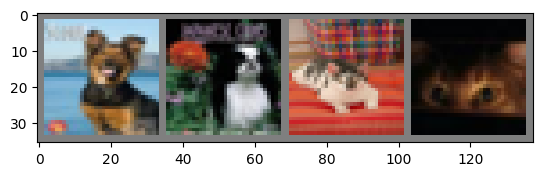

In [ ]:
# import torchvision
# imgs = [img for img in ds[:4]['x']]
# imshow(torchvision.utils.make_grid(imgs))

In [ ]:
# import torch
# IMAGE_SIZE = 28
# IMAGE_PIXELS = IMAGE_SIZE * IMAGE_SIZE
# NUM_CHANNELS = 1

# IMAGE_SIZE_CIFAR = 32
# NUM_CHANNELS_CIFAR = 3
# def read_user_data(user_index, data):
#     id = data[0][user_index]
#     train_data = data[2][id]
#     test_data = data[3][id]
#     X_train, y_train, X_test, y_test = train_data['x'], train_data['y'], test_data['x'], test_data['y']
#     X_train, y_train, X_test, y_test = train_data['x'], train_data['y'], test_data['x'], test_data['y']
#     X_train = torch.Tensor(X_train).view(-1, NUM_CHANNELS_CIFAR, IMAGE_SIZE_CIFAR, IMAGE_SIZE_CIFAR).type(torch.float32)
#     y_train = torch.Tensor(y_train).type(torch.int64)
#     X_test = torch.Tensor(X_test).view(-1, NUM_CHANNELS_CIFAR, IMAGE_SIZE_CIFAR, IMAGE_SIZE_CIFAR).type(torch.float32)
#     y_test = torch.Tensor(y_test).type(torch.int64)

#     train_data = [(x, y) for x, y in zip(X_train, y_train)]
#     test_data = [(x, y) for x, y in zip(X_test, y_test)]
#     return id, train_data, test_data

In [ ]:
# import torch
# from tqdm import trange
# import torchvision
# from torchvision import transforms
# import numpy as np
# import random
# import os

# def read_cifa_data():
#     transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#     trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
#     testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
#     trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset.data),shuffle=False)
#     testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset.data),shuffle=False)

#     for _, train_data in enumerate(trainloader,0):
#         trainset.data, trainset.targets = train_data
#     for _, train_data in enumerate(testloader,0):
#         testset.data, testset.targets = train_data

#     random.seed(1)
#     np.random.seed(1)
#     NUM_USERS = 20 # should be muitiple of 10
#     NUM_LABELS = 3
#     # Setup directory for train/test data
#     train_path = './data/train/cifa_train_100.json'
#     test_path = './data/test/cifa_test_100.json'
#     dir_path = os.path.dirname(train_path)
#     if not os.path.exists(dir_path):
#         os.makedirs(dir_path)
#     dir_path = os.path.dirname(test_path)
#     if not os.path.exists(dir_path):
#         os.makedirs(dir_path)

#     cifa_data_image = []
#     cifa_data_label = []

#     cifa_data_image.extend(trainset.data.cpu().detach().numpy())
#     cifa_data_image.extend(testset.data.cpu().detach().numpy())
#     cifa_data_label.extend(trainset.targets.cpu().detach().numpy())
#     cifa_data_label.extend(testset.targets.cpu().detach().numpy())
#     cifa_data_image = np.array(cifa_data_image)
#     cifa_data_label = np.array(cifa_data_label)

#     cifa_data = []
#     for i in trange(10):
#         idx = cifa_data_label==i
#         cifa_data.append(cifa_data_image[idx])


#     print("\nNumb samples of each label:\n", [len(v) for v in cifa_data])
#     users_lables = []

#     ###### CREATE USER DATA SPLIT #######
#     # Assign 100 samples to each user
#     X = [[] for _ in range(NUM_USERS)]
#     y = [[] for _ in range(NUM_USERS)]
#     idx = np.zeros(10, dtype=np.int64)
#     for user in range(NUM_USERS):
#         for j in range(NUM_LABELS):  # 3 labels for each users
#             #l = (2*user+j)%10
#             l = (user + j) % 10
#             print("L:", l)
#             X[user] += cifa_data[l][idx[l]:idx[l]+10].tolist()
#             y[user] += (l*np.ones(10)).tolist()
#             idx[l] += 10

#     print("IDX1:", idx)  # counting samples for each labels

#     # Assign remaining sample by power law
#     user = 0
#     props = np.random.lognormal(
#         0, 2., (10, NUM_USERS, NUM_LABELS))  # last 5 is 5 labels
#     props = np.array([[[len(v)-NUM_USERS]] for v in cifa_data]) * \
#         props/np.sum(props, (1, 2), keepdims=True)
#     # print("here:",props/np.sum(props,(1,2), keepdims=True))
#     #props = np.array([[[len(v)-100]] for v in mnist_data]) * \
#     #    props/np.sum(props, (1, 2), keepdims=True)
#     #idx = 1000*np.ones(10, dtype=np.int64)
#     # print("here2:",props)
#     for user in trange(NUM_USERS):
#         for j in range(NUM_LABELS):  # 4 labels for each users
#             # l = (2*user+j)%10
#             l = (user + j) % 10
#             num_samples = int(props[l, user//int(NUM_USERS/10), j])
#             numran1 = random.randint(300, 600)
#             num_samples = (num_samples)  + numran1 #+ 200
#             if(NUM_USERS <= 20): 
#                 num_samples = num_samples * 2
#             if idx[l] + num_samples < len(cifa_data[l]):
#                 X[user] += cifa_data[l][idx[l]:idx[l]+num_samples].tolist()
#                 y[user] += (l*np.ones(num_samples)).tolist()
#                 idx[l] += num_samples
#                 print("check len os user:", user, j,
#                     "len data", len(X[user]), num_samples)

#     print("IDX2:", idx) # counting samples for each labels

#     # Create data structure
#     train_data = {'users': [], 'user_data':{}, 'num_samples':[]}
#     test_data = {'users': [], 'user_data':{}, 'num_samples':[]}

#     # Setup 5 users
#     # for i in trange(5, ncols=120):
#     for i in range(NUM_USERS):
#         uname = i
#         combined = list(zip(X[i], y[i]))
#         random.shuffle(combined)
#         X[i][:], y[i][:] = zip(*combined)

#         num_samples = len(X[i])
#         train_len = int(0.75*num_samples)
#         test_len = num_samples - train_len

#         #X_train, X_test, y_train, y_test = train_test_split(X[i], y[i], train_size=0.75, stratify=y[i])\
        
#         test_data['users'].append(uname)
#         test_data["user_data"][uname] =  {'x': X[i][:test_len], 'y': y[i][:test_len]} 
#         test_data['num_samples'].append(test_len)

#         train_data["user_data"][uname] =  {'x': X[i][test_len:], 'y': y[i][test_len:]}
#         train_data['users'].append(uname)
#         train_data['num_samples'].append(train_len)
        
   

#     return train_data['users'], _ , train_data['user_data'], test_data['user_data']


In [ ]:
# from torchvision.datasets import ImageFolder
# from torchvision import transforms
# # the training transforms
# import torchvision.transforms as transforms

# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(300, scale=(0.8, 1.0)),  # Random crop + resize
#     transforms.RandomHorizontalFlip(p=0.5),  # Flip with 50% probability
#     transforms.RandomRotation(10),  # Rotate within ±10 degrees
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color augmentation
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalize to [-1, 1]
# ])


# # the validation transforms
# valid_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(
#         mean=[0.5, 0.5, 0.5],
#         std=[0.5, 0.5, 0.5]
#     )
# ])

In [ ]:
# from torchvision import transforms, datasets
# import torch
# train_dataset = datasets.ImageFolder(root="./RF data", transform=train_transforms)

In [ ]:
# from torch.utils.data import Dataset, Subset
# from collections import defaultdict

# # Assume dataset has a .targets attribute that holds class labels
# class_to_indices = defaultdict(list)

# # Group dataset indices by class
# for idx, (_, label) in enumerate(train_dataset):
#     class_to_indices[label].append(idx)

# # Now class_to_indices[label] contains all indices of images belonging to `label`


In [ ]:
# class_splits = {label: Subset(train_dataset, indices) for label, indices in class_to_indices.items()}


In [ ]:
# from torch.utils.data import random_split

# train_ratio = 0.8

# train_subsets = {}
# test_subsets = {}

# for label, subset in class_splits.items():
#     subset_size = len(subset)
#     train_size = int(train_ratio * subset_size)
#     test_size = subset_size - train_size

#     train_subset, test_subset = random_split(subset, [train_size, test_size])
    
#     train_subsets[label] = train_subset
#     test_subsets[label] = test_subset


In [ ]:
# from torch.utils.data import Dataset

# class DictDataset(Dataset):
#     def __init__(self, subset):
#         self.subset = subset  # A Subset of the original dataset

#     def __len__(self):
#         return len(self.subset)

#     def __getitem__(self, idx):
#         x, y = self.subset[idx]  # Extract image and label
#         return {"x": x, "y": y}  # Return as a dictionary




In [ ]:
# DictDataset(train_subsets[0])

In [ ]:
# r = np.random.randint(0, len(train_dataset), 1)[0]
# image = train_dataset[r][0]
# print(image.shape)
# # show image
# import matplotlib.pyplot as plt
# import numpy as np
# plt.imshow(image.numpy().reshape(224, 224, 3))
# plt.show()

In [ ]:
# # get the numeric  values of all the labels in the dataset
# labels = [train_dataset[i][1] for i in range(len(train_dataset))]
# print(labels)

In [ ]:
# set(labels)

In [ ]:
# label = train_dataset[r][1]
# label

In [ ]:
# # load efficnetnetv3
# import torch
# import torchvision.models as models


In [ ]:
# model = models.efficientnet_b0(pretrained=False)  # Load EfficientNet-B0 without pretraining
# num_classes = 20 
# model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, num_classes)
# model = model.eval()
# output = model(image.unsqueeze(0))
# print(output.shape)

In [ ]:
# prediction = torch.argmax(output, dim=1)
# prediction

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# df = pd.read_csv('Encoded.csv')

In [ ]:
# df

In [ ]:
import networkx as nx
from community import community_louvain

# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = community_louvain.best_partition(G)


In [ ]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 3,
 5: 3,
 6: 3,
 7: 0,
 8: 1,
 9: 1,
 10: 3,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 3,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 2,
 24: 2,
 25: 2,
 26: 1,
 27: 2,
 28: 1,
 29: 1,
 30: 1,
 31: 2,
 32: 1,
 33: 1}

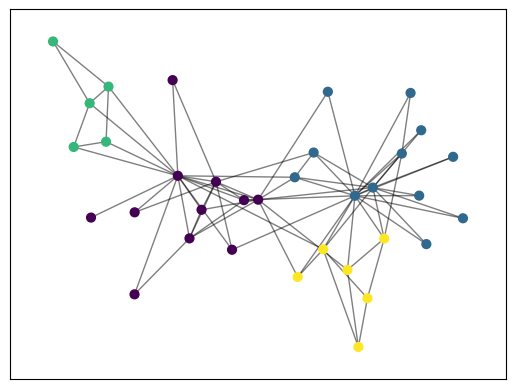

In [ ]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
# save as pdf
plt.savefig("outcome.png")
plt.show()

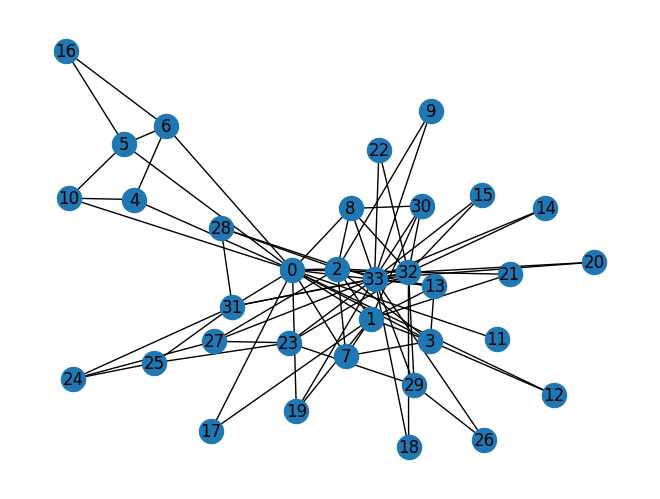

In [ ]:
# draw the original graph G
nx.draw(G, with_labels=True)
plt.savefig("original.png")
plt.show()


In [ ]:
# partition

In [ ]:
# # from fedai.FLearner import *  # noqa: F403
# from fedai.learner_utils import *  # noqa: F403
# from fedai.utils import * # noqa: F403
# from omegaconf import OmegaConf

# def cfg_fn(f):
#     cfg = load_config(f)  # noqa: F405
#     cfg = OmegaConf.create(cfg)
#     return cfg
# cfg = cfg_fn('cfg.yaml')

In [ ]:
# cfg.model.name

In [ ]:
# import argparse
# args = argparse.Namespace(**cfg)

In [ ]:
# args.project_name

In [ ]:
# from fedai.federated.agents import *  # noqa: F403
# import torch
# client = client_fn(FLAgent, cfg, id= 0, latest_round={}, loss_fn=torch.nn.CrossEntropyLoss())  # noqa: F405


In [ ]:
# from fedai.FLearner import * # noqa: F403

# flearner = FLearner(cfg, client_fn, client_cls= PadgAgent)  # noqa: F405


In [ ]:
# cfg

In [ ]:
# flearner.run_simulation()

In [ ]:
# 